In [1]:
!pip install imbalanced-learn
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/06/zgq5nry52cl5j51xzvhlj5240000gn/T/ipykernel_8798/786837061.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# First Dataset
df1 = pd.read_csv("/Users/danae/Downloads/TCGA_dataset/prediction_file_crc.csv")

# Handle "nan" strings
df1.replace('nan', np.nan, inplace=True)

# Check for missing values and display counts
missing_values_df1 = df1.isna().sum()
print(f"Missing Values in First Dataset:\n{missing_values_df1}\n")

# Remove rows with missing values
df1_cleaned = df1.dropna()
df1_cleaned.dtypes
# Display cleaned DataFrame
print("Cleaned First Dataset:")
#df1_cleaned.head()

# Remove rows where MSI status is 'Indeterminate'
msi_status_column = 'msi_status'
df1_filtered = df1_cleaned[df1_cleaned[msi_status_column] != 'Indeterminate']

# Display the filtered DataFrame
print("Filtered First Dataset:")
df1_filtered
# Replace 'nan' strings with actual NaN values
df1.replace('nan', np.nan, inplace=True)
df1_cleaned = df1.dropna()

# Check for missing values in the cleaned dataset
missing_values_df1_cleaned = df1_cleaned.isna().sum()
print(f"Missing Values in Cleaned Dataset:\n{missing_values_df1_cleaned}\n")


Missing Values in First Dataset:
Unnamed: 0                  0
TBL                         0
msi_status                 25
fraction_genome_altered     0
aneuploidy_score            0
TMB                         0
TP53                        0
KRAS                        0
BRAF                        0
APC                         0
TTN                         0
dtype: int64

Cleaned First Dataset:
Filtered First Dataset:
Missing Values in Cleaned Dataset:
Unnamed: 0                 0
TBL                        0
msi_status                 0
fraction_genome_altered    0
aneuploidy_score           0
TMB                        0
TP53                       0
KRAS                       0
BRAF                       0
APC                        0
TTN                        0
dtype: int64



In [4]:
#Second dataset 
df2=pd.read_csv("/Users/danae/Downloads/TCGA_dataset/tcga_rna_count_data_crc.csv")
expression_columns = df2.columns[1:]

# Replace 'nan' strings with actual NaN values
df2.replace('nan', np.nan, inplace=True)

# Replace 0s with NaN in gene expression columns
df2[expression_columns] = df2[expression_columns].replace(0, np.nan)

# Drop rows where any gene expression is NaN
df2_filtered = df2.dropna(subset=expression_columns, how='any')

# Reset the index
df2_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print("Filtered Second Dataset:")
df2_filtered
# Replace 'nan' strings with actual NaN values
df2.replace('nan', np.nan, inplace=True)
df2_filtered = df2.dropna()
df2_filtered


Filtered Second Dataset:


,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779.0,527763.0,351929.0,287719.0,190175.0,534458.0,258680.0,609116.0,1788482.0,...,967151.0,253949.0,357582.0,193103.0,378175.0,241368.0,174340.0,344243.0,187689.0,120685.0
1,COX1,174425.0,550980.0,221923.0,77856.0,126014.0,573269.0,334800.0,988344.0,882782.0,...,503826.0,178148.0,277609.0,169953.0,328256.0,270218.0,159090.0,244393.0,186843.0,113810.0
2,COX2,215346.0,455961.0,219310.0,224206.0,121250.0,539229.0,239678.0,729632.0,770006.0,...,688044.0,100534.0,233873.0,148345.0,196468.0,253742.0,107697.0,196681.0,104451.0,99580.0
3,COX3,215935.0,224912.0,194021.0,249685.0,163588.0,640377.0,215029.0,496405.0,509296.0,...,656321.0,119946.0,133931.0,76543.0,247324.0,265639.0,130445.0,200891.0,90755.0,137800.0
4,ACTB,114483.0,273373.0,111800.0,266851.0,94666.0,199718.0,508419.0,342245.0,275784.0,...,264552.0,123410.0,150556.0,171336.0,90398.0,371604.0,124204.0,210810.0,235117.0,150755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16025,PIP5KL1,4.0,39.0,2.0,24.0,12.0,13.0,14.0,4.0,8.0,...,8.0,11.0,7.0,4.0,6.0,12.0,3.0,3.0,249.0,10.0
16051,P2RX5-TAX1BP3,18.0,71.0,13.0,30.0,13.0,21.0,26.0,22.0,18.0,...,28.0,22.0,22.0,12.0,9.0,20.0,25.0,21.0,37.0,15.0
16077,RPS15AP19,8.0,8.0,69.0,8.0,7.0,5.0,13.0,15.0,12.0,...,21.0,11.0,7.0,17.0,43.0,9.0,33.0,20.0,17.0,40.0
16163,LINC00539,19.0,59.0,20.0,17.0,15.0,30.0,30.0,10.0,24.0,...,13.0,63.0,12.0,4.0,19.0,20.0,21.0,8.0,15.0,3.0


In [5]:
# Transpose the second dataframe
df2_transposed=df2_filtered.T
df2_transposed
# Reset the index and use the first row as column names
df2_transposed.reset_index(inplace=True)
df2_transposed.columns = df2_transposed.iloc[0]

# Drop the first row (it's now redundant)
df2_transposed = df2_transposed.iloc[1:]

# Merge the two dataframes based on index with specified suffixes
merged_df = df1_filtered.merge(df2_transposed, left_on='Unnamed: 0', right_on='Unnamed: 0', suffixes=('', '_df2'))

# Reset the index of the merged dataframe
merged_df.reset_index(drop=True, inplace=True)
merged_df
#merged_df.to_csv(path_or_buf="/Users/danae/Downloads/TCGA_dataset/merged.csv")

,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,...,RPL5P4,GPR146,ARMH1,S1PR5,HSP90B2P,PIP5KL1,P2RX5-TAX1BP3,RPS15AP19,LINC00539,XRCC6P2
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,...,16.0,34.0,68.0,36.0,17.0,20.0,17.0,9.0,24.0,10.0
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,...,18.0,37.0,16.0,9.0,9.0,75.0,21.0,8.0,57.0,7.0
2,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,...,14.0,18.0,15.0,51.0,5.0,63.0,41.0,8.0,27.0,1.0
3,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,...,9.0,9.0,5.0,13.0,12.0,14.0,28.0,8.0,32.0,3.0
4,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,SNV,...,7.0,9.0,37.0,32.0,6.0,89.0,29.0,1.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,...,9.0,7.0,37.0,17.0,14.0,39.0,41.0,4.0,41.0,4.0
431,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,...,35.0,18.0,7.0,14.0,7.0,3.0,15.0,4.0,54.0,8.0
432,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,...,19.0,10.0,39.0,48.0,15.0,36.0,40.0,6.0,52.0,14.0
433,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,...,9.0,32.0,12.0,12.0,15.0,15.0,100.0,12.0,43.0,17.0


<Axes: xlabel='msi_status'>

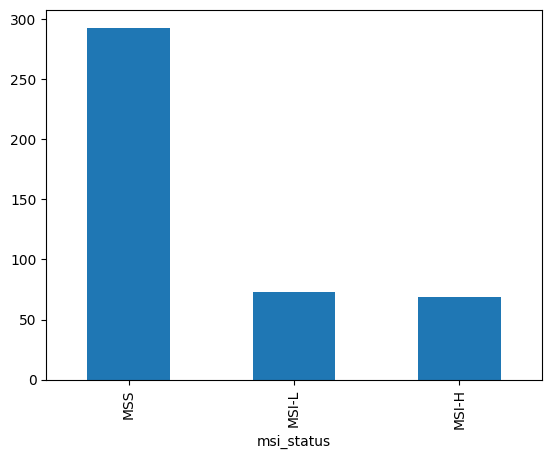

In [6]:
merged_df['msi_status'].value_counts().plot(kind = 'bar')

In [7]:
#VALIDATION SET BEFORE OVERSAMPLING
#Drop msi_status column as it's already encoded
X = merged_df.drop(['Unnamed: 0', 'msi_status','TBL','fraction_genome_altered','aneuploidy_score','TMB','TP53','KRAS','BRAF','APC','TTN'], axis=1)
# Encode the target variable
label_encoder = LabelEncoder()
merged_df['msi_status_encoded'] = label_encoder.fit_transform(merged_df['msi_status'])
y = merged_df['msi_status_encoded']
# Splitting data into train-test sets before oversampling
X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-validation split before oversampling
X_train, X_val, y_train, y_val = train_test_split(X_train_pre, y_train_pre, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the validation set before oversampling
y_val_pred_pre = rf_classifier.predict(X_val)
# Define class labels
class_labels = label_encoder.classes_
# Evaluate the model performance on the validation set before oversampling
accuracy_val_pre = accuracy_score(y_val, y_val_pred_pre)
conf_matrix_val_pre = confusion_matrix(y_val, y_val_pred_pre)
classification_report_val_pre = classification_report(y_val, y_val_pred_pre,target_names=class_labels)

print("Validation Set Performance Before Oversampling:")
print(f"Accuracy: {accuracy_val_pre:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_val_pre}")
print("Classification Report:\n", classification_report_val_pre)

Validation Set Performance Before Oversampling:
Accuracy: 0.87
Confusion Matrix:
[[ 8  0  0]
 [ 0  0  9]
 [ 0  0 53]]
Classification Report:
               precision    recall  f1-score   support

       MSI-H       1.00      1.00      1.00         8
       MSI-L       0.00      0.00      0.00         9
         MSS       0.85      1.00      0.92        53

    accuracy                           0.87        70
   macro avg       0.62      0.67      0.64        70
weighted avg       0.76      0.87      0.81        70



/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
X_train
#X_val
#y_train
# y_val

,ND4,COX1,COX2,COX3,ACTB,EEF1A1,CYTB,ACTG1,ND2,ATP6,...,RPL5P4,GPR146,ARMH1,S1PR5,HSP90B2P,PIP5KL1,P2RX5-TAX1BP3,RPS15AP19,LINC00539,XRCC6P2
136,431198.0,664571.0,352430.0,431232.0,106645.0,89608.0,111232.0,104873.0,59664.0,172770.0,...,21.0,5.0,7.0,6.0,5.0,11.0,17.0,5.0,2.0,2.0
412,419345.0,463529.0,283692.0,299568.0,274092.0,260184.0,185156.0,271516.0,157849.0,148027.0,...,13.0,18.0,17.0,23.0,14.0,34.0,33.0,5.0,11.0,7.0
314,76021.0,148152.0,75509.0,54263.0,202756.0,255596.0,24203.0,178363.0,21801.0,27580.0,...,23.0,24.0,42.0,18.0,20.0,31.0,47.0,8.0,20.0,19.0
357,770663.0,655032.0,537360.0,549447.0,220074.0,295765.0,299601.0,156415.0,313978.0,312318.0,...,12.0,59.0,26.0,15.0,14.0,20.0,15.0,13.0,14.0,17.0
74,93717.0,104779.0,67239.0,53571.0,265608.0,146327.0,43393.0,209672.0,16981.0,38227.0,...,1.0,19.0,29.0,11.0,10.0,7.0,8.0,8.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,115619.0,94929.0,79638.0,67052.0,39175.0,121572.0,36851.0,30348.0,33456.0,34876.0,...,88.0,2.0,7.0,2.0,32.0,5.0,3.0,44.0,6.0,43.0
364,251825.0,168541.0,248021.0,303731.0,154856.0,192444.0,115820.0,154187.0,158106.0,109487.0,...,13.0,47.0,21.0,15.0,13.0,54.0,49.0,27.0,53.0,32.0
196,324748.0,299829.0,166816.0,204572.0,124843.0,68152.0,147786.0,87264.0,94798.0,78956.0,...,14.0,16.0,34.0,40.0,27.0,32.0,28.0,15.0,15.0,18.0
269,196552.0,118215.0,251644.0,249694.0,113433.0,429177.0,96919.0,62815.0,335760.0,119115.0,...,35.0,31.0,8.0,10.0,5.0,17.0,19.0,15.0,21.0,12.0


In [9]:
#VALIDATION SET AFTER OVERSAMPLING
# Oversample the training set using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train a Random Forest Classifier on the resampled data
rf_classifier_resampled = RandomForestClassifier(random_state=42)
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set after oversampling
y_val_pred_post = rf_classifier_resampled.predict(X_val)
# Define class labels
class_labels = label_encoder.classes_
# Evaluate the model performance on the validation set after oversampling
accuracy_val_post = accuracy_score(y_val, y_val_pred_post)
conf_matrix_val_post = confusion_matrix(y_val, y_val_pred_post)
classification_report_val_post = classification_report(y_val, y_val_pred_post,target_names=class_labels)

print("\nValidation Set Performance After Oversampling:")
print(f"Accuracy: {accuracy_val_post:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_val_post}")
print("Classification Report:\n", classification_report_val_post)



Validation Set Performance After Oversampling:
Accuracy: 0.80
Confusion Matrix:
[[ 8  0  0]
 [ 0  0  9]
 [ 2  3 48]]
Classification Report:
               precision    recall  f1-score   support

       MSI-H       0.80      1.00      0.89         8
       MSI-L       0.00      0.00      0.00         9
         MSS       0.84      0.91      0.87        53

    accuracy                           0.80        70
   macro avg       0.55      0.64      0.59        70
weighted avg       0.73      0.80      0.76        70



In [10]:
X_train_resampled

,ND4,COX1,COX2,COX3,ACTB,EEF1A1,CYTB,ACTG1,ND2,ATP6,...,RPL5P4,GPR146,ARMH1,S1PR5,HSP90B2P,PIP5KL1,P2RX5-TAX1BP3,RPS15AP19,LINC00539,XRCC6P2
0,431198.0,664571.0,352430.0,431232.0,106645.0,89608.0,111232.0,104873.0,59664.0,172770.0,...,21.0,5.0,7.0,6.0,5.0,11.0,17.0,5.0,2.0,2.0
1,419345.0,463529.0,283692.0,299568.0,274092.0,260184.0,185156.0,271516.0,157849.0,148027.0,...,13.0,18.0,17.0,23.0,14.0,34.0,33.0,5.0,11.0,7.0
2,76021.0,148152.0,75509.0,54263.0,202756.0,255596.0,24203.0,178363.0,21801.0,27580.0,...,23.0,24.0,42.0,18.0,20.0,31.0,47.0,8.0,20.0,19.0
3,770663.0,655032.0,537360.0,549447.0,220074.0,295765.0,299601.0,156415.0,313978.0,312318.0,...,12.0,59.0,26.0,15.0,14.0,20.0,15.0,13.0,14.0,17.0
4,93717.0,104779.0,67239.0,53571.0,265608.0,146327.0,43393.0,209672.0,16981.0,38227.0,...,1.0,19.0,29.0,11.0,10.0,7.0,8.0,8.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,598434.678699,744482.529243,449032.438271,332181.028183,279376.120472,311631.771253,313151.896266,287812.176726,186037.83494,138392.727551,...,19.245172,31.961373,26.396728,75.97921,22.622586,130.468076,25.32095,10.867757,21.264485,16.887071
536,754373.809312,467828.716427,324040.28273,333566.39645,221265.400379,246731.736269,363534.366187,166231.558335,349091.405556,247776.813247,...,15.952099,37.230971,37.028216,30.884515,17.230971,9.278871,28.230971,12.047901,13.721129,16.394357
537,222103.64576,157121.836365,131632.713193,140234.274141,204696.95715,267218.326835,71846.232839,271897.257366,108464.209858,74851.829318,...,55.599284,12.404294,12.602863,9.0,25.407872,9.797853,12.501789,38.212882,21.205725,52.815745
538,513949.873931,608692.081891,377168.832085,333810.176269,370849.779408,193959.262923,250038.898035,228007.35743,218522.315312,195636.956015,...,20.846661,42.233306,19.613355,37.35367,23.0,32.234134,32.466611,7.766694,13.920033,19.233306


In [11]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Hyperparameter Tuning with GridSearchCV and Cross-Validation
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 10, None],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_classifier = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator from grid search
best_rf_classifier = grid_search.best_estimator_
# Get the best hyperparameters
best_hyperparameters = grid_search.best_estimator_.get_params()

# Print the best hyperparameters
print("Best Hyperparameters:")
for param_name in sorted(param_grid.keys()):
    print(f"{param_name}: {best_hyperparameters[param_name]}")

Best Hyperparameters:
bootstrap: False
max_depth: None
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 300


In [12]:
# Predict on the test set
y_pred_test = best_rf_classifier.predict(X_test)

# Evaluate the model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test, target_names=class_labels)

# Print the performance metrics
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_test}")
print("Classification Report:\n", classification_report_test)


Test Set Performance:
Accuracy: 0.72
Confusion Matrix:
[[11  0  2]
 [ 0  1 13]
 [ 2  7 51]]
Classification Report:
               precision    recall  f1-score   support

       MSI-H       0.85      0.85      0.85        13
       MSI-L       0.12      0.07      0.09        14
         MSS       0.77      0.85      0.81        60

    accuracy                           0.72        87
   macro avg       0.58      0.59      0.58        87
weighted avg       0.68      0.72      0.70        87



<Axes: >

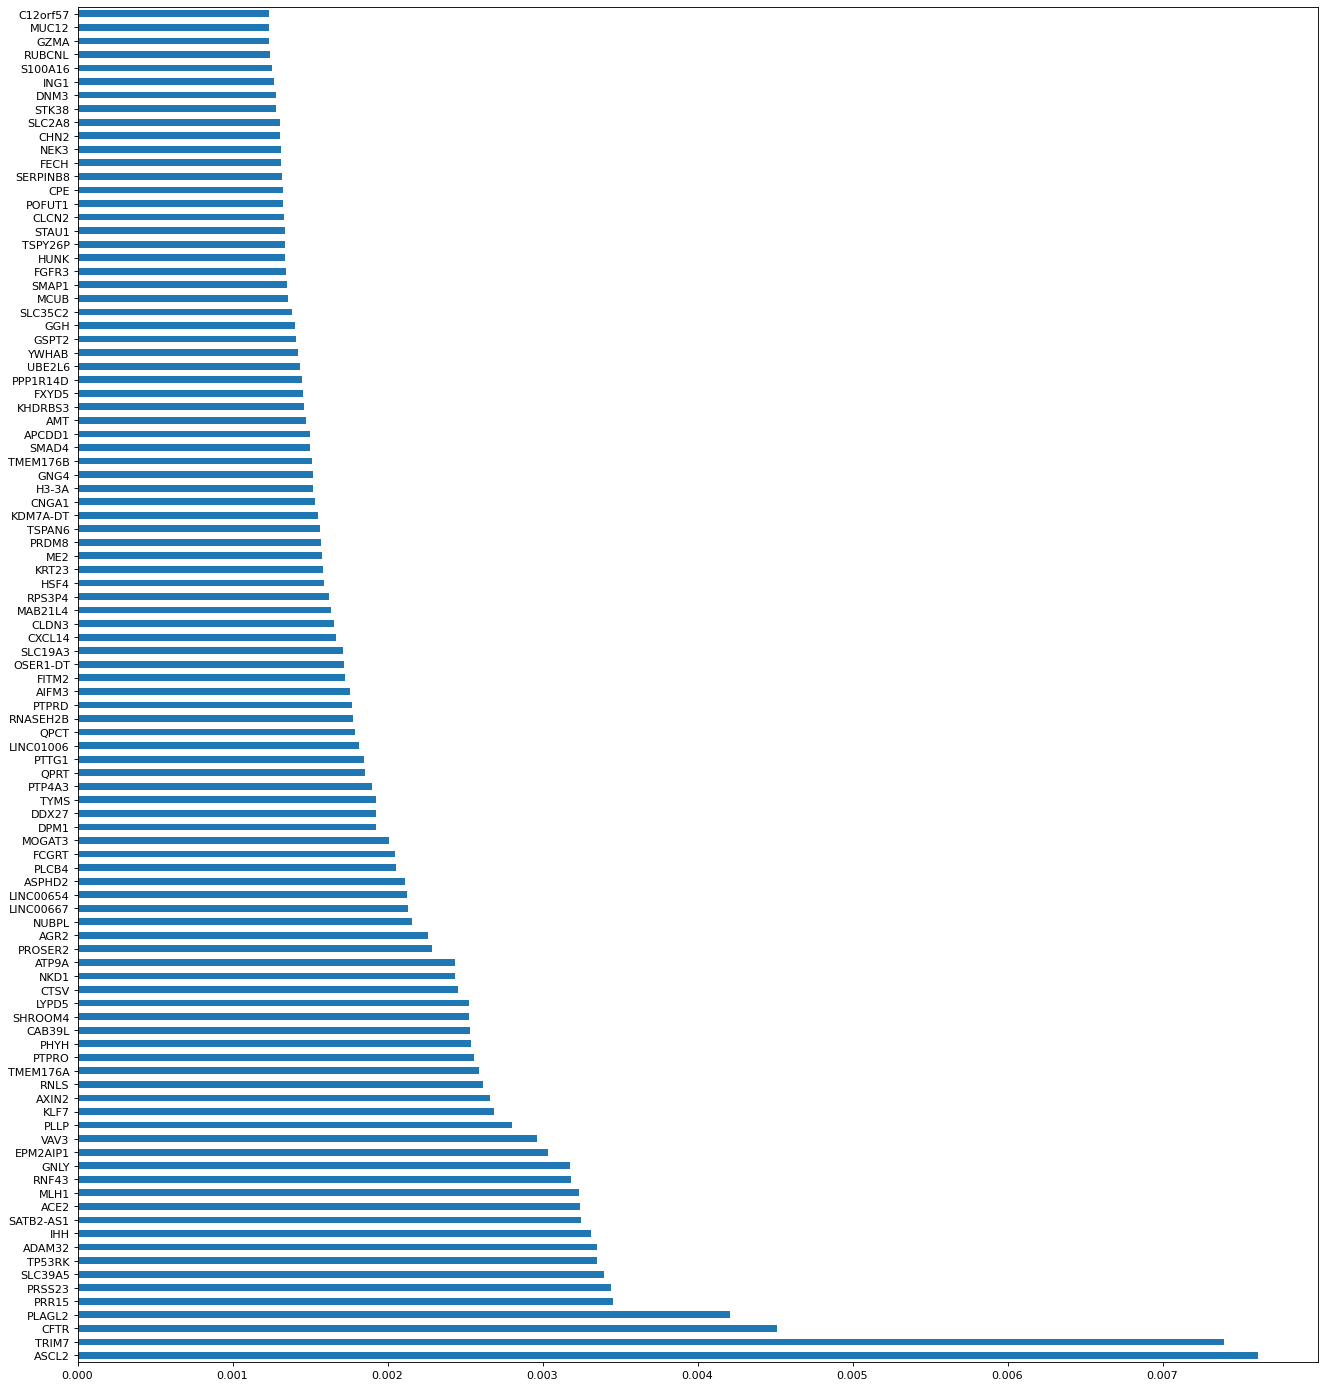

In [13]:
plt.figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

#get the top 100 features
feat_importances = pd.Series(best_rf_classifier.feature_importances_, index= X_train_resampled.columns)
feat_importances.nlargest(100).plot(kind='barh')

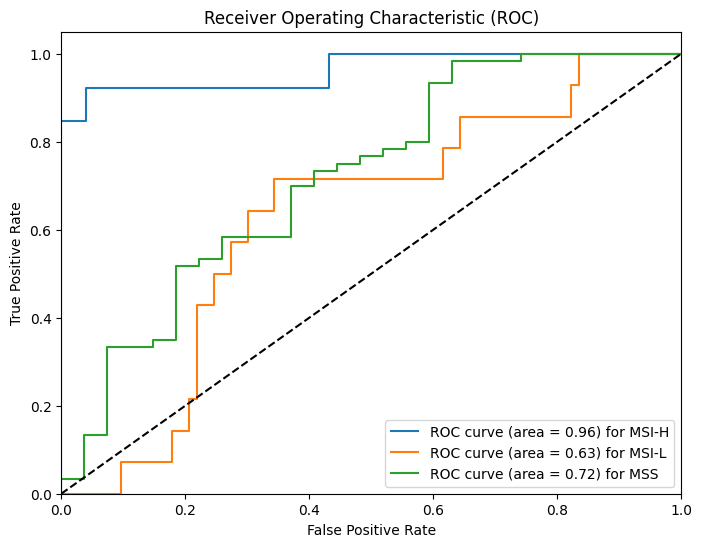

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get class probabilities for the test set
y_prob_test = best_rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_labels[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Top 10 Features:
         Feature  Importance
1784       ASCL2    0.007619
11060      TRIM7    0.007399
759         CFTR    0.004510
1809      PLAGL2    0.004208
1684       PRR15    0.003455
945       PRSS23    0.003440
2568     SLC39A5    0.003399
5316      TP53RK    0.003352
12311     ADAM32    0.003349
2545         IHH    0.003314
9606   SATB2-AS1    0.003251
4359        ACE2    0.003240
7179        MLH1    0.003235
422        RNF43    0.003184
11167       GNLY    0.003177
8139    EPM2AIP1    0.003034
2142        VAV3    0.002962
9151        PLLP    0.002805
7349        KLF7    0.002687
1004       AXIN2    0.002663


/var/folders/06/zgq5nry52cl5j51xzvhlj5240000gn/T/ipykernel_8798/880997753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


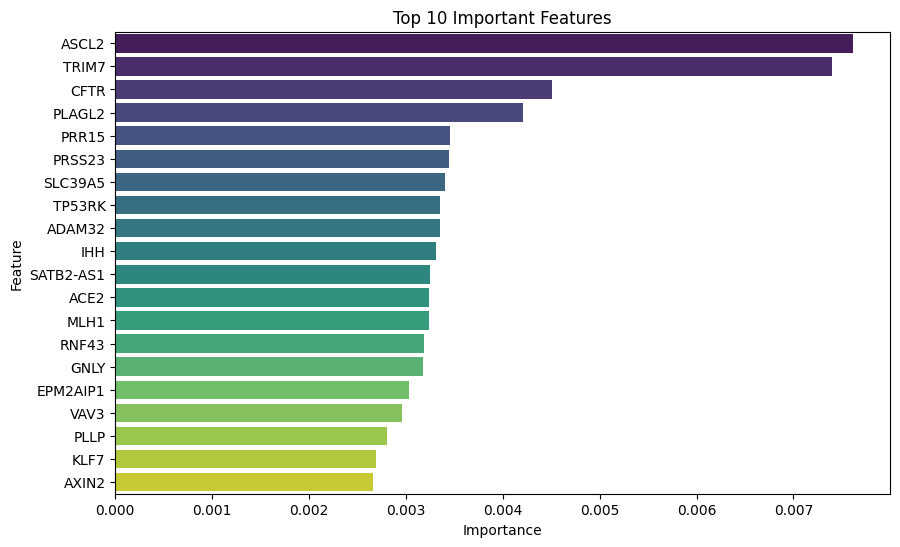

In [15]:
# Get feature importances from the best estimator
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Print the top features
print("Top 10 Features:")
print(top_features)

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

